In [1]:
%matplotlib ipympl

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [2]:
%run pyilt.py

# Import data

In [3]:
db_dir = r'./db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/'
mtau_dir = r'NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/'
data_dir = os.path.join(db_dir, mtau_dir)
cpmg_dirs = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if d[:8] == 'NMR_cpmg']
cpmg_dirs

['./db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=0.400',
 './db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=10.000',
 './db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=0.133',
 './db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=4.000',
 './db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=20.000',
 './db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_bulk=true_w=1M/NMR_multitau_min=0.10ms_max=20.0ms_pts=8_scale=manual/NMR_cpmg_t=2000.00ms_te=1.066',
 './db/NMR_multitau_slab_r=10000voxels_f=0.1Tm_rho=10.0_

In [4]:
echo_times = []
times = []
decays = []

for i, d in enumerate(cpmg_dirs):
    filepath = os.path.join(d, 'cpmg_decay.csv')
    rwdata = pd.read_csv(filepath)
    times.append(rwdata.time.values)
    decays.append(rwdata.signal.values)
    echo_times.append(times[i][1])

# sort arrays based on echo spacing
echo_times = np.array(echo_times)
inds = echo_times.argsort()

data = []
for i, idx in enumerate(inds):
    new_te = {}
    new_te['echo_time'] = echo_times[idx]
    new_te['times'] = times[idx]
    new_te['decay'] = decays[idx]
    data.append(new_te)

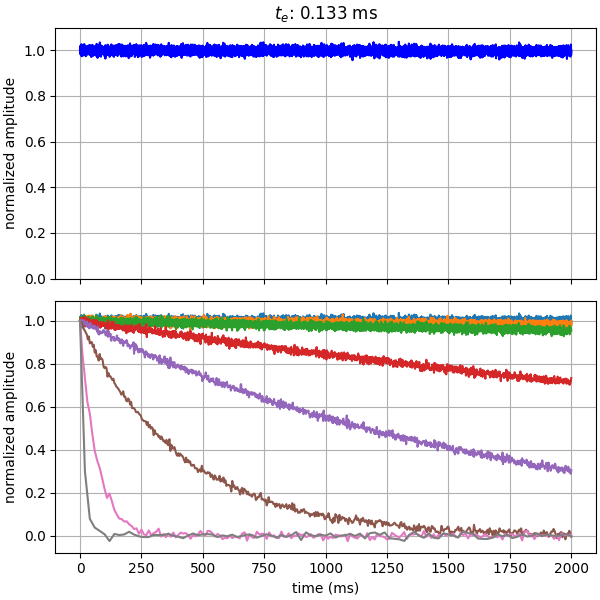

In [5]:
# If fig was created, replace it 
try:
   plt.close(fig1)
except:
    pass

output1 = widgets.Output()
 
# default line color
initial_color = 'b'
 
with output1:
    fig1, axs1 = plt.subplots(2,1,constrained_layout=True, figsize=(6, 6))
     
# move the toolbar to the bottom
axs1[1].grid(True)    
for i,d in enumerate(data):
    axs1[1].plot(d['times'], d['decay'])

ax1 = axs1[0]
fig1.canvas.toolbar_position = 'bottom'
ax1.grid(True)    
line1, = ax1.plot(data[0]['times'], data[0]['decay'], initial_color)
ax1.set_title(f"$t_e$: {data[0]['echo_time']:.3f} ms")
ax1.set_ylim([0,1.1])

for ax in axs1:
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('normalized amplitude')
    ax.label_outer()

# create some control elements
menu = widgets.Dropdown(options=np.arange(len(data)),
                        value=0,
                        description='echo time:',
                        continuous_update=False)
 
# callback functions
def update_te1(change):
    """redraw line (update plot)"""
    line1.set_xdata(data[change.new]['times'])
    line1.set_ydata(data[change.new]['decay'])
    ax1.set_title(f"$t_e$: {data[change.new]['echo_time']:.3f} ms")
    fig1.canvas.draw()
     
# connect callbacks and traits
menu.observe(update_te1, 'value')
widgets.HBox([menu, output1])

# ILT

In [6]:
nregs = 100

for i, d in enumerate(data):
    print(f"ILT: te = {d['echo_time']:.3f} ms")
    bins, amps, regs, errs, sols = lcurve(d['times'], 
                                           d['decay'], 
                                           nregs=nregs,
                                           reglims=[-3.0,1.0],
                                           nbins=512, 
                                           tmin=1e-2,
                                           tmax=1e6,
                                           nprune=512)
    d['bins'] = bins
    d['amps'] = amps
    d['regs'] = regs
    d['errs'] = errs
    d['sols'] = sols
    d['curr_reg'] = 0


ILT: te = 0.133 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.082175      
ILT: te = 0.267 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.081535      
ILT: te = 0.400 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.079397      
ILT: te = 1.067 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.069415      
ILT: te = 2.000 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.090405      
ILT: te = 4.000 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.122946      
ILT: te = 10.000 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.070328      
ILT: te = 20.000 ms
Iteration 100/100, Reguralizer 10.000000, Solution 0.043815      


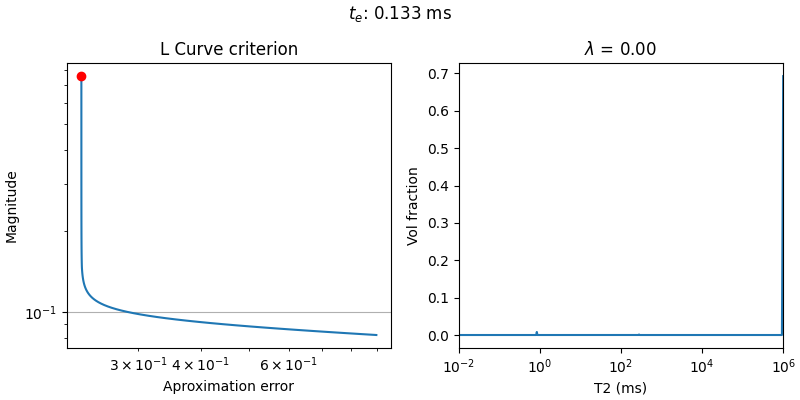

In [7]:
# If fig was created, replace it 
try:
   plt.close(fig2)
except:
    pass

output2 = widgets.Output()
 
with output2:
    fig2, axs2 = plt.subplots(1,2, figsize=(8.0,4.0), constrained_layout=True)
     
# move the toolbar to the bottom
fig2.canvas.toolbar_position = 'bottom'
fig2.suptitle(f"$t_e$: {data[0]['echo_time']:.3f} ms")
axs2[0].grid(True)
axs2[0].set_title('L Curve criterion')
axs2[0].set_xlabel('Aproximation error')
axs2[0].set_ylabel('Magnitude')
axs2[1].set_title(r'$\lambda$ = {:.2f}'.format(data[0]['regs'][0]))
axs2[1].set_xlabel('T2 (ms)')
axs2[1].set_ylabel('Vol fraction')
axs2[1].set_xlim([data[0]['bins'][0,0], data[0]['bins'][0,-1]])
# axs2[1].set_ylim([0.0, 1.0])

line2, = axs2[0].loglog(data[0]['errs'], data[0]['sols'])
point2, = axs2[0].plot([data[0]['errs'][0]], [data[0]['sols'][0]], marker='o', color='red')
dline2, = axs2[1].semilogx(data[0]['bins'][0,:], data[0]['amps'][0,:])

# create some control elements
menu2 = widgets.Dropdown(options=np.arange(len(data)),
                        value=0,
                        description='echo time:',
                        continuous_update=False)

slider2 = widgets.IntSlider(
    value=0,
    min=0, max=nregs-1, step=1,
    description='$\lambda$',
    continuous_update=False
)
 
# callback functions
curr_idx = 0
def update_te(change):
    """redraw line (update plot)"""
    global curr_idx
    curr_idx = change.new
    curr_reg = data[change.new]['curr_reg']
    line2.set_xdata(data[change.new]['errs'])
    line2.set_ydata(data[change.new]['sols'])    
    slider2.value = curr_reg
    point2.set_xdata([data[change.new]['errs'][curr_reg]])
    point2.set_ydata([data[change.new]['sols'][curr_reg]])
    dline2.set_xdata(data[change.new]['bins'][curr_reg,:])
    dline2.set_ydata(data[change.new]['amps'][curr_reg,:]) 
    
    fig2.suptitle(f"$t_e$: {data[change.new]['echo_time']:.3f} ms")
    axs2[1].set_title(r'$\lambda$ = {:.2f}'.format(data[curr_idx]['regs'][curr_reg]))
    axs2[0].set_xlim([0.9*data[curr_idx]['errs'].min(), 1.2*data[curr_idx]['errs'].max()])
    axs2[0].set_ylim([0.9*data[curr_idx]['sols'].min(), 1.2*data[curr_idx]['sols'].max()])
#     fig2.canvas.draw()

def update_reg(change):
    data[curr_idx]['curr_reg'] = change.new
    point2.set_xdata([data[curr_idx]['errs'][change.new]])
    point2.set_ydata([data[curr_idx]['sols'][change.new]])
    dline2.set_xdata(data[curr_idx]['bins'][change.new,:])
    dline2.set_ydata(data[curr_idx]['amps'][change.new,:])
    axs2[1].set_title(r'$\lambda$ = {:.2f}'.format(data[curr_idx]['regs'][change.new]))
#     fig2.canvas.draw()


# connect callbacks and traits
menu2.observe(update_te, 'value')
slider2.observe(update_reg, 'value')    
grapher2 = widgets.VBox([menu2, slider2, output2])
display(grapher2)

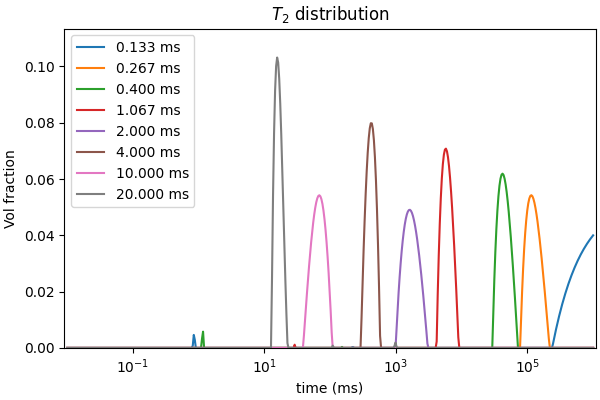

In [8]:
# If fig was created, replace it 
try:
   plt.close(fig3)
except:
    pass

fig3, axs3 = plt.subplots(1,1,figsize=(6,4),constrained_layout=True)
xmax = []
xmin = []
ymax = []
ymin = []
for d in data:
    reg_idx = d['curr_reg']
    axs3.semilogx(d['bins'][reg_idx, :], d['amps'][reg_idx, :], label=f"{d['echo_time']:.3f} ms")
    xmax.append(d['bins'][reg_idx, :].max())
    xmin.append(d['bins'][reg_idx, :].min())
    ymax.append(d['amps'][reg_idx, :].max())
    ymin.append(d['amps'][reg_idx, :].min())

axs3.set_xlim([0.9*min(xmin),1.1*max(xmax)])
axs3.set_ylim([0.9*min(ymin),1.1*max(ymax)])
axs3.set_title(r'$T_2$ distribution')
axs3.set_xlabel('time (ms)')
axs3.set_ylabel('Vol fraction')
axs3.legend(loc='best')

# Multitau curve

In [9]:
for i,d in enumerate(data):
    print(f"{i}: {d['times'].size} timesamples")

0: 15001 timesamples
1: 7501 timesamples
2: 5001 timesamples
3: 1876 timesamples
4: 1001 timesamples
5: 501 timesamples
6: 201 timesamples
7: 101 timesamples


In [16]:
pts = 20
M0 = data[0]['decay'][1:]
t0 = data[0]['times'][1:]

for i,d in enumerate(data):
    step = round(d['times'][1]/t0[0])
    d['te2t'] = d['echo_time']*d['echo_time']*d['times'][1:pts+1]
    d['tau_decay'] = d['decay'][1:pts+1]/M0[:(step*pts):step]

multitau_times = np.zeros((len(data)-1)*pts)
multitau_decay = np.zeros((len(data)-1)*pts)

for i,d in enumerate(data):
    if(i!=0):
        fidx = (i-1)*pts
        lidx = (i-1)*pts + pts
        multitau_times[fidx:lidx] = d['te2t']
        multitau_decay[fidx:lidx] = d['tau_decay']

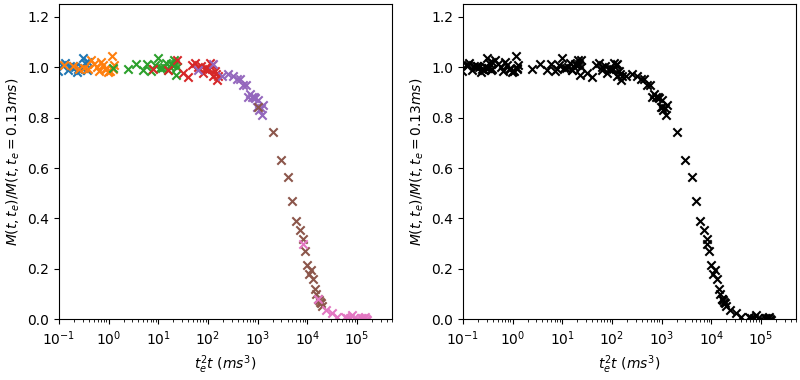

In [17]:
# If fig was created, replace it 
try:
   plt.close(fig4)
except:
    pass

fig4, axs4 = plt.subplots(1,2,figsize=(8,3.8),constrained_layout=True)

axs4[1].scatter(multitau_times, multitau_decay, marker='x', color='k')
for i,d in enumerate(data):
    if(i!=0):
        axs4[0].scatter(d['te2t'], d['tau_decay'], marker='x')

for ax in axs4:
    ax.set_xlim([1e-1, 5*1e5])
    ax.set_ylim([0, 1.25])
    ax.set_xscale('log')
    ax.set_xlabel(r'$t_{e}^{2}t$ ($ms^{3}$)')
    ax.set_ylabel(f"$M(t,t_e)/M(t,t_e={data[0]['echo_time']:.2f} ms$)")

In [18]:
D0 = 2.5e-9
gamma = 2.67e8
aux = 12.0/(gamma*gamma*D0)
grad_min = 0.01
grad_max = 100

bins, amps, regs, errs, sols = lcurve(1e-9*multitau_times, 
                                      multitau_decay, 
                                      nregs=100,
                                      reglims=[-5.0,1.1],
                                      nbins=256, 
                                      tmin=aux/grad_min**2,
                                      tmax=aux/grad_max**2,
                                      nprune=512)
grad_bins = np.zeros(bins.shape)
for i,b in enumerate(bins):
    grad_bins[i,:] = np.sqrt(aux/b)

Iteration 100/100, Reguralizer 12.589254, Solution 0.107068      


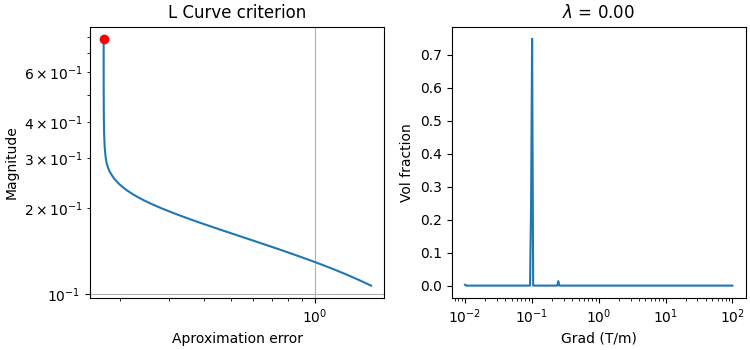

In [19]:
# If fig was created, replace it 
try:
   plt.close(fig5)
except:
    pass

fig5, axs5 = plt.subplots(1,2, figsize=(7.5,3.5), constrained_layout=True)
line5, = axs5[0].loglog(errs, sols)
point5, = axs5[0].plot([errs[0]], [sols[0]], marker='o', color='red')
axs5[0].grid(True)
axs5[0].set_title('L Curve criterion')
axs5[0].set_xlabel('Aproximation error')
axs5[0].set_ylabel('Magnitude')
axs5[1].set_title(r'$\lambda$ = {:.2f}'.format(regs[0]))
axs5[1].set_xlabel('Grad (T/m)')
axs5[1].set_ylabel('Vol fraction')

dline5, = axs5[1].semilogx(grad_bins[0,:], amps[0,:])

def update_slider5(change):
    new_idx = change.new
    point5.set_xdata([errs[new_idx]])
    point5.set_ydata([sols[new_idx]])
    dline5.set_xdata(grad_bins[new_idx,:])
    dline5.set_ydata(amps[new_idx,:])
    axs5[1].set_title(r'$\lambda$ = {:.2f}'.format(regs[new_idx]))
    fig5.canvas.draw()

int_slider5 = widgets.IntSlider(
    value=0,
    min=0, max=regs.size-1, step=1,
    description='$\lambda$',
    continuous_update=False
)
int_slider5.observe(update_slider5, 'value')
grapher5 = widgets.HBox([int_slider5])
display(grapher5)


In [20]:
plt.close('all')